In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from matplotlib import rc
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")



In [2]:
_METRICS_FILE = './files/benchmark_sensitivityAnalysis'
_METRIC = 'total_time'
_CLASSIFIER = 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']
classifiers_to_remove = [ 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']

In [3]:
#{k:i+1 for i,k in enumerate(metrics_table.index)}
datasets_dict = {'TwoPatterns': 1,
 'CinCECGtorso': 2,
 'TwoLeadECG': 3,
 'Wafer': 4,
 'pendigits': 5,
 'FacesUCR': 6,
 'Mallat': 7,
 'FaceAll': 8,
 'Symbols': 9,
 'ItalyPowerDemand': 10,
 'ECG5000': 11,
 'MoteStrain': 12,
 'NonInvasiveFetalECGThorax1': 13,
 'NonInvasiveFetalECGThorax2': 14,
 'SwedishLeaf': 15,
 'FordA': 16,
 'Yoga': 17,
 'UWaveGestureLibraryX': 18,
 'FordB': 19,
 'ElectricDevices': 20,
 'UWaveGestureLibraryY': 21,
 'UWaveGestureLibraryZ': 22,
 'HandOutlines': 23,
 'InsectWingbeatSound': 24,
 'ShapesAll': 25,
 'MedicalImages': 26,
 'PhalangesOutlinesCorrect': 27,
 'ChlorineConcentration': 28,
 'Phoneme': 29}

In [4]:
#metrics_table_full_kappa

In [5]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~(metrics.classifier.str.contains('keras') & metrics.classifier.str.contains('pool') & ~metrics.classifier.str.contains('60x90'))]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics.dataset.isin(list(datasets_dict.keys()))]


metrics['instancespersecond'] = metrics['instances']/metrics['total_time']
metrics['timeperinstance'] = metrics['total_time']/metrics['instances']
metrics['minutes'] = metrics['total_time']/60

metrics_table_full_kappa = metrics.pivot(index='dataset',columns='classifier')['kappa']
#metrics_table_full_kappa = metrics_table_full_kappa.dropna()
metrics_table_full_kappa = metrics_table_full_kappa.reindex(metrics_table_full_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full_kappa = metrics_table_full_kappa.sort_values(by=list(metrics_table_full_kappa.columns), ascending=False)
metrics_table_full_kappa = metrics_table_full_kappa[metrics_table_full_kappa.columns[0:]]
columns_full = list(metrics_table_full_kappa.columns)
columns_full = [columns_full[1]] + [columns_full[0]] + columns_full[2:]
metrics_table_full_kappa = metrics_table_full_kappa[columns_full]

metrics_table_full = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
#metrics_table_full = metrics_table_full.dropna()
metrics_table_full = metrics_table_full.reindex(metrics_table_full_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full = metrics_table_full.reindex(index=metrics_table_full_kappa.index)
metrics_table_full = metrics_table_full[metrics_table_full.columns[0:]]
columns_full = list(metrics_table_full.columns)
columns_full = [columns_full[1]] + [columns_full[0]] + columns_full[2:]
metrics_table_full = metrics_table_full[columns_full]

metrics_full = metrics.copy()

metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier', 'MOA_NaiveBayes'])]


print(len(metrics.dataset.unique()), "datasets")
metrics.sample(100)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,instancespersecond,timeperinstance,minutes
3356,HandOutlines,keras_parallel_keras_parallel_3_Dilated_Conv_p...,1280,2709,2,0.880725,0.717150,0.283602,1.559812e-01,0.439584,4.254035,2.339718,4.254035,300.890768,0.003323,0.070901
1437,ECG5000,MOA_NaiveBayes,5000,140,5,0.863463,0.750474,0.000026,3.485584e-04,0.000374,0.012776,0.174279,0.187055,26730.130411,0.000037,0.003118
7942,TwoLeadECG,keras_parallel_keras_parallel_3_Dilated_Conv_p...,1072,82,2,0.998001,0.995836,0.169963,1.259016e-01,0.295865,2.039558,1.510819,2.039558,525.603971,0.001903,0.033993
8692,Wafer,sklearn_MLPClassifier,7154,152,2,0.997718,0.990666,0.000910,1.774946e-04,0.001088,0.651674,0.127086,0.778760,9186.402218,0.000109,0.012979
8545,UWaveGestureLibraryZ,sklearn_MLPClassifier,4468,315,8,0.643737,0.572224,0.005106,3.956047e-04,0.005501,2.282244,0.176835,2.459079,1816.940211,0.000550,0.040985
8530,UWaveGestureLibraryZ,keras_parallel_keras_parallel_3_Dilated_Conv_p...,4388,315,8,0.772875,0.719889,0.139306,8.554597e-02,0.224852,6.825978,4.191753,6.825978,642.838282,0.001556,0.113766
4679,Mallat,keras_parallel_keras_parallel_3_Dilated_Conv_p...,2310,1024,8,0.975918,0.969640,0.172149,1.098254e-01,0.281974,4.475876,2.855461,4.475876,516.100133,0.001938,0.074598
1774,ElectricDevices,MOA_LeveragingBag,16637,96,7,0.577055,0.468425,0.009860,3.341746e-03,0.013202,16.406712,5.560665,21.967376,757.350339,0.001320,0.366123
7486,SwedishLeaf,sklearn_SGDClassifier,1115,128,15,0.309225,0.241384,0.001149,7.659410e-05,0.001226,0.128722,0.008579,0.137301,8120.845868,0.000123,0.002288
329,ChlorineConcentration,MOA_SingleClassifierDrift,4307,166,3,0.474552,0.122219,0.000285,2.442848e-04,0.000529,0.122785,0.105287,0.228072,18884.418519,0.000053,0.003801


In [6]:
print(list(metrics_table_full.columns))
print(list(metrics_table_full.index))

['keras_3_Dilated_Conv', 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90', 'sklearn_MLPClassifier', 'MOA_NaiveBayes', 'MOA_SingleClassifierDrift', 'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_LeveragingBag', 'MOA_RandomHoeffdingTree', 'MOA_OzaBoostAdwin', 'MOA_OzaBoost', 'sklearn_BernoulliNB', 'MOA_HoeffdingAdaptiveTree', 'MOA_ActiveClassifier', 'MOA_OzaBag', 'MOA_AdaHoeffdingOptionTree', 'MOA_OzaBagAdwin', 'MOA_OzaBagASHT', 'sklearn_PassiveAggressiveClassifier', 'sklearn_SGDClassifier', 'sklearn_Perceptron', 'MOA_DecisionStump', 'MOA_OCBoost', 'MOA_SPegasos', 'MOA_MajorityClass']
['TwoPatterns', 'CinCECGtorso', 'Wafer', 'TwoLeadECG', 'pendigits', 'FaceAll', 'FacesUCR', 'Mallat', 'Symbols', 'ChlorineConcentration', 'ItalyPowerDemand', 'SwedishLeaf', 'ECG5000', 'MoteStrain', 'Yoga', 'NonInvasiveFetalECGThorax1', 'NonInvasiveFetalECGThorax2', 'FordA', 'FordB', 'UWaveGestureLibraryX', 'ElectricDevices', 'UWaveGestureLibraryY', 'UWaveGestureLibrar

In [7]:
#kappa table
metrics_table_kappa = metrics.pivot(index='dataset',columns='classifier')['kappa']
#metrics_table_kappa = metrics_table_kappa.dropna()
metrics_table_kappa = metrics_table_kappa.reindex(metrics_table_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_kappa = metrics_table_kappa.sort_values(by=list(metrics_table_kappa.columns), ascending=False)
metrics_table_kappa = metrics_table_kappa[metrics_table_kappa.columns[0:]]

metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
#metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.reindex(index=metrics_table_kappa.index)
metrics_table = metrics_table[metrics_table.columns[0:]]

metrics_table = metrics_table.reindex(datasets_dict.keys(), axis=0)
metrics_table

limits = ( 0, metrics_table.max().max())
print(limits)

metrics_table

(0, 321.425213282)


classifier,keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90,sklearn_MLPClassifier,MOA_NaiveBayes,MOA_SingleClassifierDrift,MOA_ASHoeffdingTree,MOA_HoeffdingTree,MOA_LeveragingBag,MOA_OzaBoostAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,
TwoPatterns,7.794133,0.469626,0.143602,0.245352,0.323179,0.299086,6.544951,2.601823,0.281698
CinCECGtorso,3.053936,1.221879,0.540160,0.993481,1.208453,1.217683,22.071268,10.364966,0.341138
TwoLeadECG,2.039558,0.091060,0.011793,0.019434,0.027181,0.030149,0.544053,0.420940,0.027231
Wafer,10.320596,0.778760,0.371527,0.251931,0.246253,0.218305,5.404364,4.231454,0.234448
pendigits,13.530990,0.779593,0.094604,0.188041,0.186575,0.189011,3.647886,2.599348,0.875312
FacesUCR,3.777401,0.216237,0.206723,0.394743,0.462462,0.470126,7.502576,6.344354,0.251160
Mallat,4.475876,1.502281,1.156474,2.237730,2.564332,2.585380,46.864588,26.765002,0.560855
FaceAll,3.543113,0.212365,0.220009,0.409949,0.479132,0.463587,7.583297,6.335840,0.252889
Symbols,1.978833,0.410105,0.131446,0.250829,0.321668,0.299731,6.755027,3.343133,0.173827


In [8]:
classifier_labels_full = {
    'keras_3_Dilated_Conv': 'CNN',
    'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90':'AsynDL',
    'sklearn_MLPClassifier':'MLP',
    'MOA_NaiveBayes':'NB',
    'MOA_SingleClassifierDrift':'SCD',
    'MOA_ASHoeffdingTree':'ASHT',
    'MOA_HoeffdingTree':'HT',
    'MOA_HoeffdingOptionTree':'HOT',
    'MOA_LeveragingBag':'LBAG',
    'MOA_RandomHoeffdingTree':'RHT',
    'MOA_OzaBoostAdwin':'BO-AD',
    'MOA_OzaBoost':'BO',
    'sklearn_BernoulliNB':'BNB',
    'MOA_HoeffdingAdaptiveTree':'HAT',
    'MOA_ActiveClassifier':'AC',
    'MOA_OzaBag':'BA',
    'MOA_AdaHoeffdingOptionTree':'ADHT',
    'MOA_OzaBagAdwin':'BA-AD',
    'MOA_OzaBagASHT':'B-ASHT',
    'sklearn_PassiveAggressiveClassifier':'PAC',
    'sklearn_SGDClassifier':'SGD',
    'sklearn_Perceptron':'P',
    'MOA_DecisionStump':'DST',
    'MOA_OCBoost':'OCBO',
    'MOA_SPegasos':'SPEG',
    'MOA_MajorityClass':'MC',
    'MOA_Perceptron':'P'
}

[classifier_labels_full[l] for l in metrics_table_full.columns]

abbr_full_ls = [classifier_labels_full[l] for l in metrics_table_full.columns]
abbr_ls = [classifier_labels_full[l] for l in metrics_table.columns]

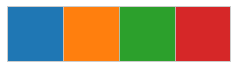

In [9]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)
pal = {'AsynDL':(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'CNN':(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}


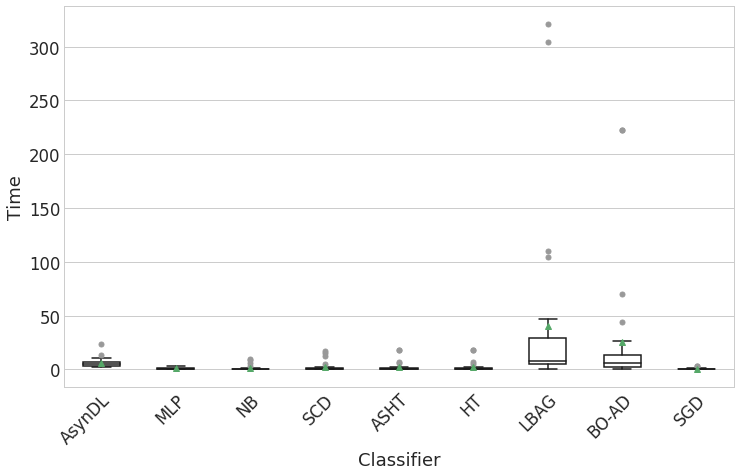

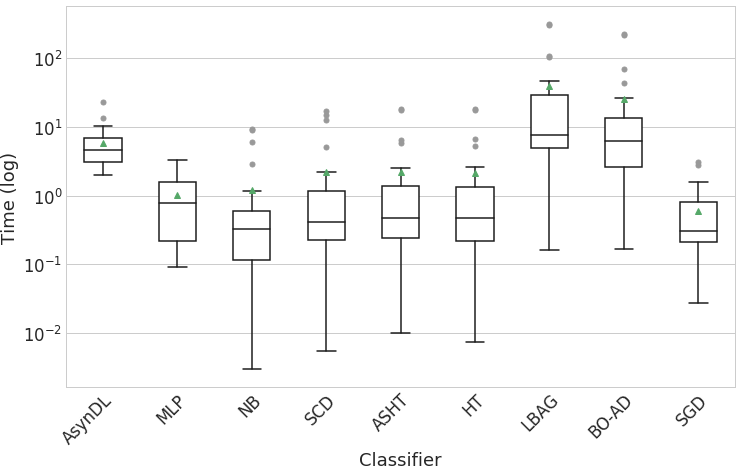

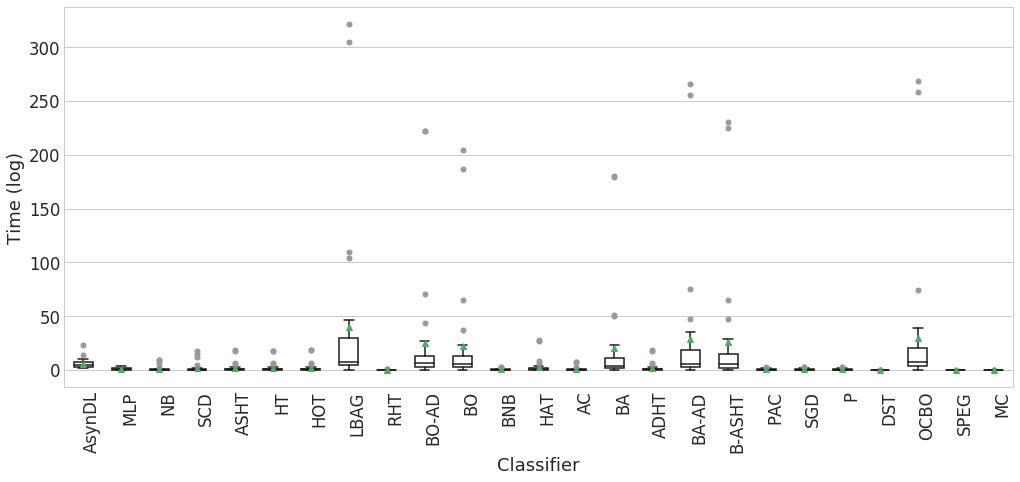

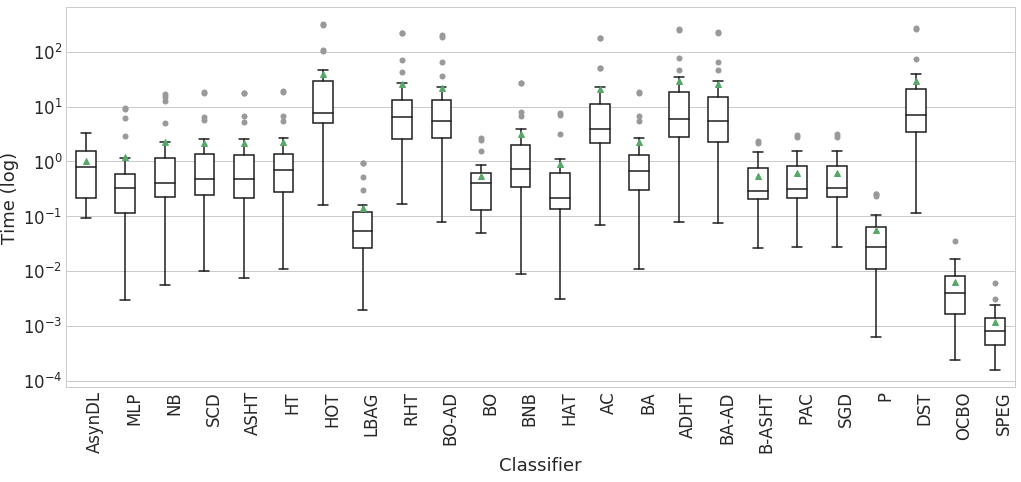

In [10]:
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(12,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    plt.savefig("files/plots/boxplot-top-time.eps", format='eps', bbox_inches='tight')

    
# Log scaled 
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(12,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    plt.savefig("files/plots/boxplot-top-time-log.eps", format='eps', bbox_inches='tight')

sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(17,7))
    sns.boxplot(data=metrics_table_full[metrics_table_full.columns[1:]],  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    
    plt.savefig("files/plots/boxplot-time.eps", format='eps', bbox_inches='tight')
    
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(17,7))
    sns.boxplot(data=metrics_table_full[metrics_table_full.columns[2:]],  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    
    plt.savefig("files/plots/boxplot-time-log.eps", format='eps', bbox_inches='tight')

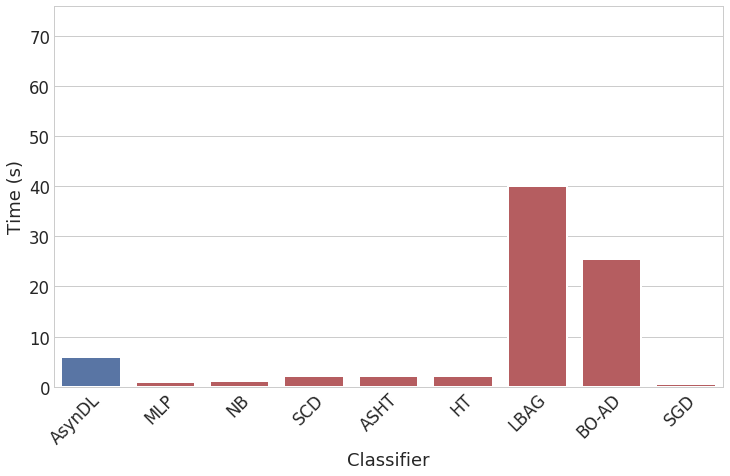

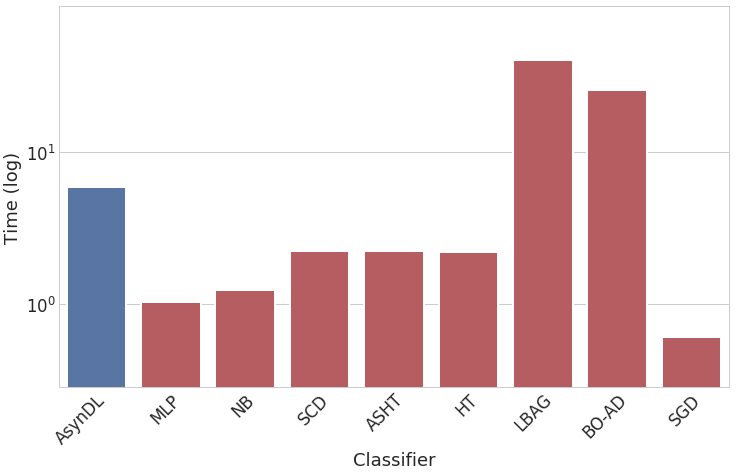

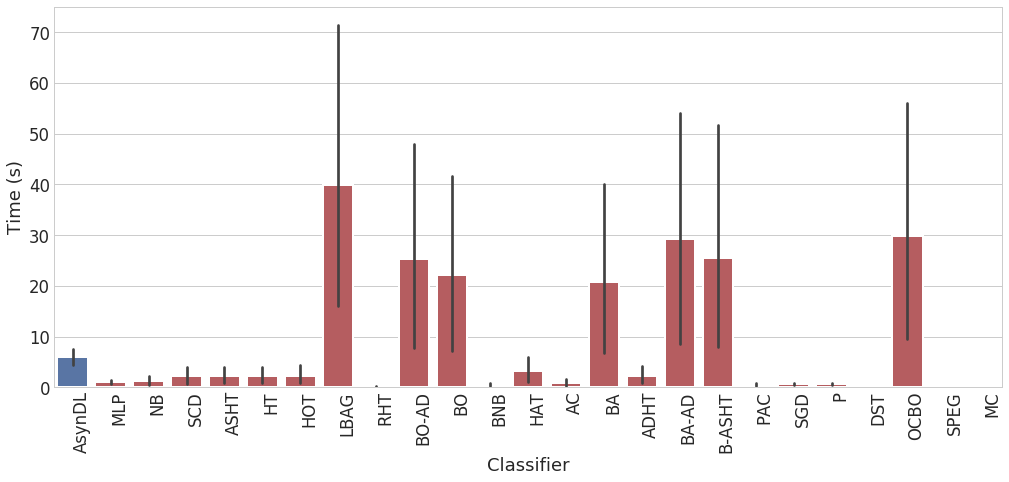

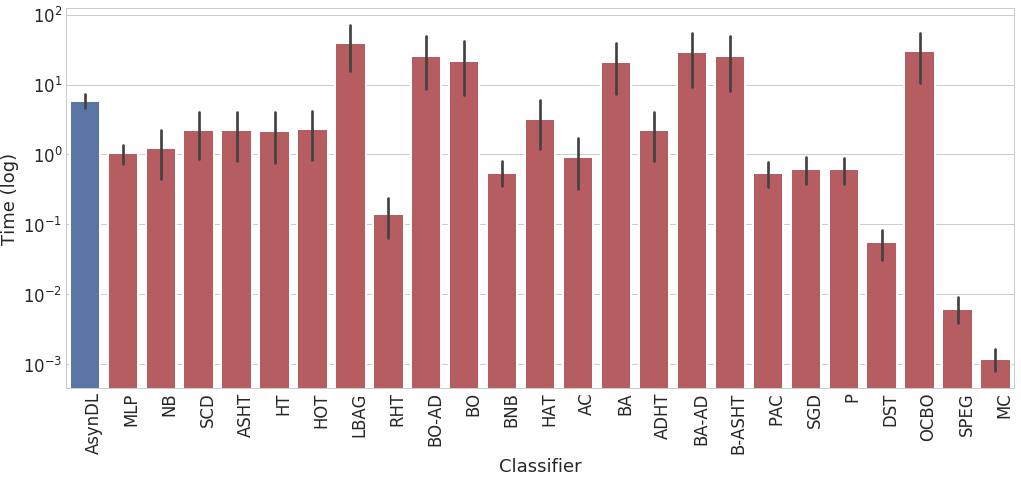

In [17]:
sns.set(font_scale=1.5)
pal_bar = {clf: (pal['AsynDL'] if classifier_labels_full[clf] is 'AsynDL' else pal['CNN']) for clf in set(metrics_table_full.columns)}
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=metrics_table,  ax=ax, errwidth=0, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (s)')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.savefig("files/plots/barplot-top-time.eps", format='eps', bbox_inches='tight')

sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=metrics_table,  ax=ax, errwidth=0, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.savefig("files/plots/barplot-top-time-log.eps", format='eps', bbox_inches='tight')
    
    
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(17,7))
    sns.barplot(data=metrics_table_full[metrics_table_full.columns[1:]],  ax=ax, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (s)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    #ax.set_ylim(0,0.015)
    plt.savefig("files/plots/barplot-time.eps", format='eps', bbox_inches='tight')
    
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(17,7))
    sns.barplot(data=metrics_table_full[metrics_table_full.columns[1:]],  ax=ax, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.savefig("files/plots/barplot-time-log.eps", format='eps', bbox_inches='tight')
    

In [12]:
metrics_aux = metrics_full[metrics_full.classifier.isin(metrics_table_full.columns[:2])]
metrics_aux['classifier'] = [classifier_labels_full[clf] for clf in metrics_aux['classifier']]
metrics_aux['dataset_n'] = [datasets_dict[d] for d in metrics_aux['dataset']]
metrics_aux = metrics_aux.sort_values('dataset_n')
metrics_aux

/usr/local/share/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/share/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,instancespersecond,timeperinstance,minutes,dataset_n
7983,TwoPatterns,CNN,5000,128,4,0.998229,0.997534,0.340802,0.001188,0.341990,170.060359,0.592750,170.653110,29.299202,0.034131,2.844218,1
8089,TwoPatterns,AsynDL,4910,128,4,0.999989,0.999982,0.141712,0.087445,0.229157,7.794133,4.809502,7.794133,629.960989,0.001587,0.129902,1
478,CinCECGtorso,CNN,1420,1639,4,0.802216,0.721376,2.937070,0.004514,2.941584,414.126924,0.636423,414.763346,3.423639,0.292087,6.912722,2
584,CinCECGtorso,AsynDL,1330,1639,4,0.998249,0.997410,0.203596,0.144402,0.347998,3.053936,2.166033,3.053936,435.503593,0.002296,0.050899,2
7836,TwoLeadECG,CNN,1162,82,2,0.987537,0.976206,0.227822,0.001333,0.229155,26.427396,0.154640,26.582036,43.713732,0.022876,0.443034,3
7942,TwoLeadECG,AsynDL,1072,82,2,0.998001,0.995836,0.169963,0.125902,0.295865,2.039558,1.510819,2.039558,525.603971,0.001903,0.033993,3
8677,Wafer,AsynDL,7074,152,2,0.999063,0.997124,0.130640,0.076438,0.207079,10.320596,6.038617,10.320596,685.425533,0.001459,0.172010,4
8571,Wafer,CNN,7164,152,2,0.889121,0.278497,0.383839,0.001213,0.385052,274.828764,0.868425,275.697190,25.985031,0.038484,4.594953,4
9261,pendigits,CNN,10992,16,10,0.960480,0.952094,0.115867,0.000729,0.116596,127.337528,0.801213,128.138741,85.782020,0.011657,2.135646,5
9367,pendigits,AsynDL,10902,16,10,0.988656,0.986177,0.110910,0.068473,0.179383,13.530990,8.353696,13.530990,805.705991,0.001241,0.225517,5


/usr/local/share/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/share/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


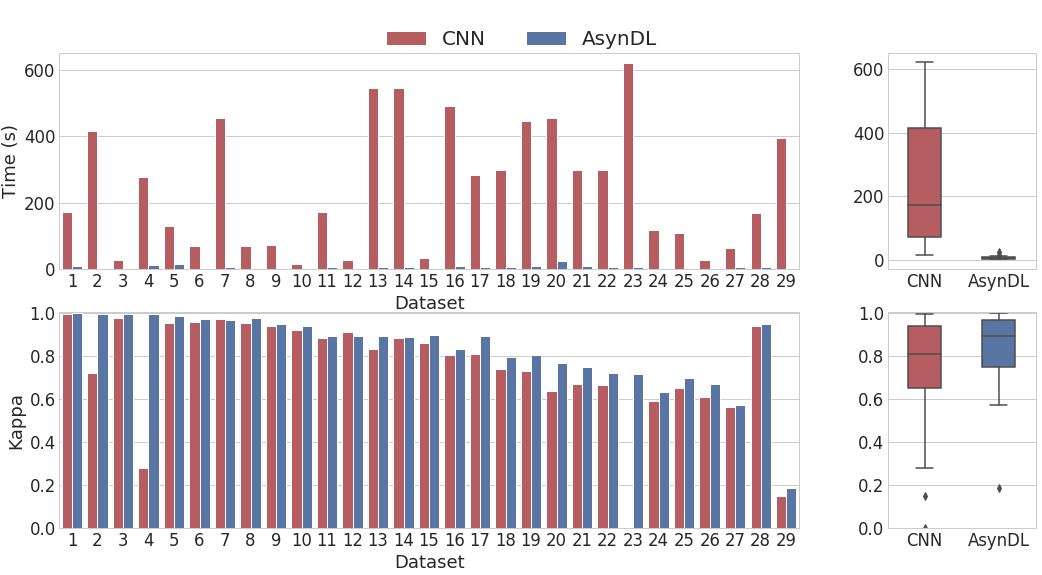

In [13]:
metrics_aux = metrics_full[metrics_full.classifier.isin(metrics_table_full.columns[:2])]
metrics_aux['classifier'] = [classifier_labels_full[clf] for clf in metrics_aux['classifier']]
metrics_aux['dataset_n'] = [datasets_dict[d] for d in metrics_aux['dataset']]
metrics_aux = metrics_aux.sort_values('dataset_n')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(2,2,figsize=(17.5,8.75), gridspec_kw = {'width_ratios':[5, 1]})
    sns.barplot(data=metrics_aux,  ax=ax[0][0], x='dataset_n', y=_METRIC, hue='classifier', palette=pal)
    ax[0][0].set_ylabel('Time (s)')
    ax[0][0].set_xlabel('Dataset')
    #ax[0][0].set_ylim((0,700))
    
    handles, labels = ax[0][0].get_legend_handles_labels()
    ax[0][0].get_legend().remove()
    
    sns.boxplot(data=metrics_aux[['classifier', _METRIC, 'dataset']], x="classifier", y=_METRIC, ax=ax[0,1], palette=pal, width=0.45)
    ax[0][1].set_xlabel('')
    ax[0][1].set_ylabel('')
    #ax[0][1].set_ylim((0,700))
        
    sns.barplot(data=metrics_aux,  ax=ax[1][0], x='dataset_n', y='kappa', hue='classifier', palette=pal)
    ax[1][0].set_ylabel('Kappa')
    ax[1][0].set_xlabel('Dataset')
    ax[1][0].get_legend().remove()    
    ax[1][0].set_ylim((0,1.005))
    
    sns.boxplot(data=metrics_aux[['classifier', 'kappa', 'dataset']], x="classifier", y='kappa', ax=ax[1,1], palette=pal, width=0.45)
    ax[1][1].set_xlabel('')
    ax[1][1].set_ylabel('')
    ax[1][1].set_ylim((0,1.005))
    
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=20, borderpad=0.0, borderaxespad=1.5)# bbox_to_anchor=(0.5, 0.86))
    plt.savefig("files/plots/sequential-comparison.eps", format='eps', bbox_inches='tight')

    

In [14]:
metrics_aux_table = metrics_aux.pivot(index='dataset', columns='classifier', values=_METRIC) 
metrics_aux_table['CNN/AsynDL'] = metrics_aux_table['CNN'] / metrics_aux_table['AsynDL']
metrics_aux_table

classifier,AsynDL,CNN,CNN/AsynDL
dataset,,,
ChlorineConcentration,5.940580,168.956533,28.441085
CinCECGtorso,3.053936,414.763346,135.812728
ECG5000,6.880997,171.895532,24.981196
ElectricDevices,23.222347,454.263779,19.561493
FaceAll,3.543113,70.080970,19.779491
FacesUCR,3.777401,70.202306,18.584818
FordA,9.542280,491.995427,51.559523
FordB,7.180391,446.639370,62.202657
HandOutlines,4.254035,621.194134,146.024672


In [15]:
print("max: ", metrics_aux_table['CNN/AsynDL'].max())
print("min: ", metrics_aux_table['CNN/AsynDL'].min())
print("mean: ", metrics_aux_table['CNN/AsynDL'].mean())

max:  146.02467174563873
min:  6.777708761453975
mean:  44.73280200452568


In [16]:
metrics_aux_table = metrics_aux.pivot(index='dataset', columns='classifier', values=['total_time', 'kappa']) 
metrics_aux_table['dataset_n'] = [datasets_dict[d] for d in metrics_aux_table.index]
metrics_aux_table = metrics_aux_table.sort_values('dataset_n')
del metrics_aux_table['dataset_n']

metrics_aux_table.to_csv('./files/sequential-parallel-results.csv', sep=',', encoding='utf-8')
metrics_aux_table

total_time                 kappa          
classifier                     AsynDL         CNN    AsynDL       CNN
dataset                                                              
TwoPatterns                  7.794133  170.653110  0.999982  0.997534
CinCECGtorso                 3.053936  414.763346  0.997410  0.721376
TwoLeadECG                   2.039558   26.582036  0.995836  0.976206
Wafer                       10.320596  275.697190  0.997124  0.278497
pendigits                   13.530990  128.138741  0.986177  0.952094
FacesUCR                     3.777401   70.202306  0.974315  0.957582
Mallat                       4.475876  454.880152  0.969640  0.973497
FaceAll                      3.543113   70.080970  0.977290  0.953781
Symbols                      1.978833   71.569447  0.950480  0.941238
ItalyPowerDemand             1.982897   13.439499  0.939397  0.919610
ECG5000                      6.880997  171.895532  0.894935  0.885228
MoteStrain                   2.407256   28.176768  0.894516  0.911419
NonInvasiveFetalECGThorax1   6.944861  545.552842  0.893001  0.831313
NonInvasiveFetalECGThorax2   7.023324  544.988541  0.887571  0.883795
SwedishLeaf                  2.119334   31.870064  0.896721  0.862795
FordA                        9.542280  491.995427  0.831710  0.806356
Yoga                         5.472699  282.561055  0.893695  0.812517
UWaveGestureLibraryX         6.934809  297.714357  0.797814  0.742314
FordB                        7.180391  446.639370  0.807580  0.732232
ElectricDevices             23.222347  454.263779  0.767867  0.637363
UWaveGestureLibraryY         7.241289  297.791168  0.751504  0.671944
UWaveGestureLibraryZ         6.825978  297.732984  0.719889  0.664091
HandOutlines                 4.254035  621.194134  0.717150  0.000000
InsectWingbeatSound          3.483100  117.109639  0.632102  0.590804
ShapesAll                    2.432285  108.425364  0.696359  0.652709
MedicalImages                1.983591   27.306230  0.668554  0.609829
PhalangesOutlinesCorrect     4.599749   62.246598  0.574679  0.562415
ChlorineConcentration        5.940580  168.956533  0.948243  0.942341
Phoneme                      3.678332  393.291977  0.189648  0.150143